In [1]:
# import libraries

import json
import requests
import numpy as np
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt
import time
from config import api_key

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [48]:
# create variables for url to query api end point
units = 'imperial'
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = f"{base_url}appid={api_key}&units={units}&q="

# Create empty lists to append weather data
city_data = []

# Loop through multiple cities to append weather data to empty lists

print('Beginning Data Retrieval')
print('------------------------')
for iteration, city in enumerate(cities):
    target_url = query_url + city
    
    # Parse out the max temp, humidty, and cloudiness
    try:
        print(f"Processing Record {iteration} | {city}")
        response = requests.get(target_url)
        city_weather = response.json()
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_clouds = city_weather['clouds']['all']
        city_humidity = city_weather['main']['humidity']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
     
   # Append the city information into city_data list
        city_data.append({"City" : city,
                          "Latitude" : city_lat,
                          "Longitude" : city_lon,
                          "Max Temperature" : city_max_temp,
                          "Humidity" : city_humidity,
                          "Cloudiness" : city_clouds,
                          "Wind Speed" : city_wind,
                          "Coutnry" : city_country,
                          "Date" : city_date})        
    except:
        print('City not found. Skipping...')
        pass

Beginning Data Retrieval
------------------------
Processing Record 0 | yellowknife
Processing Record 1 | busselton
Processing Record 2 | hobart
Processing Record 3 | amderma
City not found. Skipping...
Processing Record 4 | tuy hoa
Processing Record 5 | ushuaia
Processing Record 6 | chokurdakh
Processing Record 7 | hilo
Processing Record 8 | east london
Processing Record 9 | chuy
Processing Record 10 | tuktoyaktuk
Processing Record 11 | faanui
Processing Record 12 | vaini
Processing Record 13 | sherbakul
Processing Record 14 | mataura
Processing Record 15 | inongo
Processing Record 16 | torbay
Processing Record 17 | launceston
Processing Record 18 | seymchan
Processing Record 19 | tiksi
Processing Record 20 | saldanha
Processing Record 21 | jamestown
Processing Record 22 | ngunguru
Processing Record 23 | hermanus
Processing Record 24 | new norfolk
Processing Record 25 | sitka
Processing Record 26 | teahupoo
Processing Record 27 | nizhneyansk
City not found. Skipping...
Processing Reco

Processing Record 232 | les cayes
Processing Record 233 | toliary
City not found. Skipping...
Processing Record 234 | umm lajj
Processing Record 235 | ponta do sol
Processing Record 236 | novozavedennoye
Processing Record 237 | palabuhanratu
City not found. Skipping...
Processing Record 238 | los llanos de aridane
Processing Record 239 | el balyana
City not found. Skipping...
Processing Record 240 | namibe
Processing Record 241 | ugoofaaru
Processing Record 242 | lompoc
Processing Record 243 | kamenka
Processing Record 244 | sentyabrskiy
City not found. Skipping...
Processing Record 245 | aflu
City not found. Skipping...
Processing Record 246 | tabiauea
City not found. Skipping...
Processing Record 247 | bay city
Processing Record 248 | ribeira brava
Processing Record 249 | pantai remis
Processing Record 250 | cockburn town
Processing Record 251 | qaanaaq
Processing Record 252 | kegayli
City not found. Skipping...
Processing Record 253 | dukhovnitskoye
Processing Record 254 | taltal
Pr

Processing Record 459 | koygorodok
Processing Record 460 | richards bay
Processing Record 461 | sobolevo
Processing Record 462 | dudinka
Processing Record 463 | ratnagiri
Processing Record 464 | kibala
Processing Record 465 | thai binh
Processing Record 466 | nioro
Processing Record 467 | sinegorskiy
Processing Record 468 | parnamirim
Processing Record 469 | jupiter
Processing Record 470 | hamilton
Processing Record 471 | moron
Processing Record 472 | pangnirtung
Processing Record 473 | kotido
Processing Record 474 | horsham
Processing Record 475 | aksu
Processing Record 476 | nabire
Processing Record 477 | mahibadhoo
Processing Record 478 | omboue
Processing Record 479 | phayakkhaphum phisai
Processing Record 480 | erenhot
Processing Record 481 | samfya
Processing Record 482 | esmeraldas
Processing Record 483 | san joaquin
Processing Record 484 | mutsamudu
City not found. Skipping...
Processing Record 485 | mao
Processing Record 486 | san nicola
Processing Record 487 | bintulu
Process

In [50]:
weather_data = pd.DataFrame(city_data)
weather_data.to_csv('weather.csv')
weather_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Coutnry,Date
0,yellowknife,62.46,-114.35,73.99,43,20,10.29,CA,1595798767
1,busselton,-33.65,115.33,63.00,82,52,16.58,AU,1595798767
2,hobart,-42.88,147.33,45.00,93,75,1.12,AU,1595798675
3,tuy hoa,13.08,109.30,78.08,85,34,5.32,VN,1595798767
4,ushuaia,-54.80,-68.30,33.80,95,40,16.11,AR,1595798767
...,...,...,...,...,...,...,...,...,...
551,broken hill,-31.95,141.43,48.20,76,58,14.99,AU,1595798735
552,newcastle,-32.93,151.78,55.40,100,90,23.04,AU,1595798848
553,husavik,66.04,-17.34,46.40,75,20,9.17,IS,1595798848
554,inuvik,68.35,-133.72,69.80,52,75,5.82,CA,1595798848


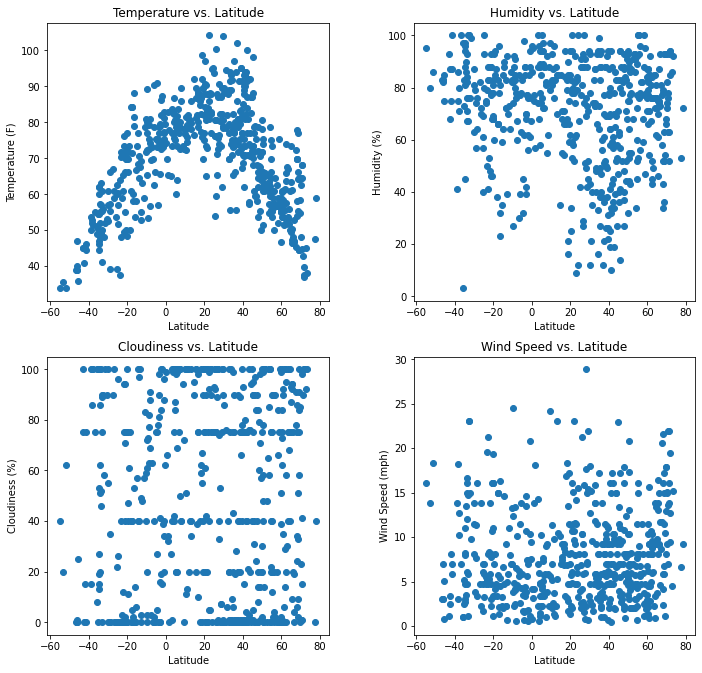

In [51]:
# Create scatterplot to show correlation of weather attributes
fig , ax = plt.subplots(2,2,figsize = (10,10))

ax[0,0].scatter(weather_data['Latitude'], weather_data['Max Temperature'])
ax[0,0].set_title('Temperature vs. Latitude')
ax[0,0].set_xlabel('Latitude')
ax[0,0].set_ylabel('Temperature (F)')

ax[0,1].scatter(weather_data['Latitude'], weather_data['Humidity'])
ax[0,1].set_title('Humidity vs. Latitude')
ax[0,1].set_xlabel('Latitude')
ax[0,1].set_ylabel('Humidity (%)')

ax[1,0].scatter(weather_data['Latitude'], weather_data['Cloudiness'])
ax[1,0].set_title('Cloudiness vs. Latitude')
ax[1,0].set_xlabel('Latitude')
ax[1,0].set_ylabel('Cloudiness (%)')

ax[1,1].scatter(weather_data['Latitude'], weather_data['Wind Speed'])
ax[1,1].set_title('Wind Speed vs. Latitude')
ax[1,1].set_xlabel('Latitude')
ax[1,1].set_ylabel('Wind Speed (mph)')

fig.subplots_adjust(left=0.08, right=0.98, bottom=.05, top=0.9, hspace=0.2, wspace=0.3)
plt.show()

In [52]:
# Create separate dataframes for cities in the northern and southern hemispheres
n_hemisphere = weather_data.loc[weather_data['Latitude'] >=0]

s_hemisphere = weather_data.loc[weather_data['Latitude'] <0]

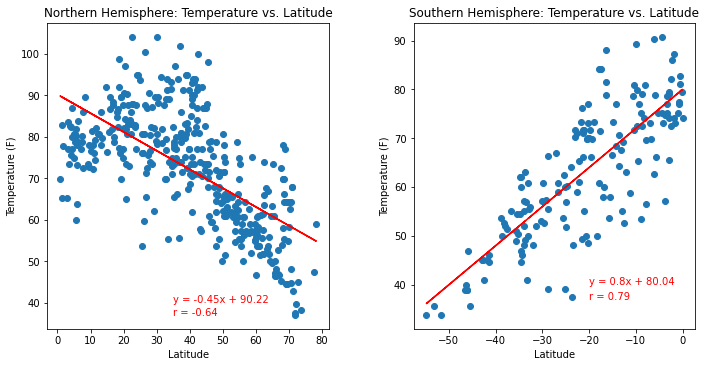

In [53]:
# Temperature plots
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Northern
ax1.scatter(n_hemisphere['Latitude'], n_hemisphere['Max Temperature'])
ax1.set_title('Northern Hemisphere: Temperature vs. Latitude')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Temperature (F)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_hemisphere['Latitude'], n_hemisphere['Max Temperature'])
regress_values = n_hemisphere['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
ax1.plot(n_hemisphere['Latitude'],regress_values, "r-")
ax1.annotate(line_eq,(35,40),fontsize=10,color="red")
ax1.annotate(f"r = {round(rvalue, 2)}", (35,37), fontsize=10,color='red')

# Sourthern
ax2.scatter(s_hemisphere['Latitude'], s_hemisphere['Max Temperature'])
ax2.set_title('Southern Hemisphere: Temperature vs. Latitude')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Temperature (F)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_hemisphere['Latitude'], s_hemisphere['Max Temperature'])
regress_values = s_hemisphere['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
ax2.plot(s_hemisphere['Latitude'],regress_values, "r-")
ax2.annotate(line_eq,(-20,40),fontsize=10,color="red")
ax2.annotate(f"r = {round(rvalue, 2)}", (-20,37), fontsize=10,color='red')

fig.subplots_adjust(left=0.08, right=0.98, bottom=.05, top=0.9, hspace=0.2, wspace=0.3)
plt.show()

# Temperature Analysis

In [45]:
# 1) Plots for northern and southern hemispheres indicate a strong, oppostite relationship to each other
#    with the northern hemisphere showing a negative relationship with latitude, and sourthern having a positive
#    relationship with latitude. However, both show a trend of decreasing temperature as you move further from
#    the equator (indicated by 0 on the x-axis)

# 2) There is a strong correlation between latitude and max temperature in both the northern and southern hemispheres,
#    with a -.67 and a .79 correlation (r-value) in the Northern and Sourthern hemisphere respectively. For the purposes
#    of this analysis r-values >.5 indicate a strong correlation.

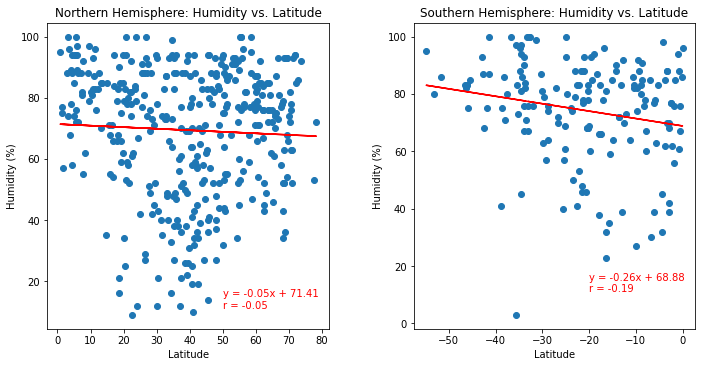

In [54]:
# Humidity plots
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#Northern
ax1.scatter(n_hemisphere['Latitude'], n_hemisphere['Humidity'])
ax1.set_title('Northern Hemisphere: Humidity vs. Latitude')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_hemisphere['Latitude'], n_hemisphere['Humidity'])
regress_values = n_hemisphere['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
ax1.plot(n_hemisphere['Latitude'],regress_values, "r-")
ax1.annotate(line_eq,(50,15),fontsize=10,color="red")
ax1.annotate(f"r = {round(rvalue, 2)}", (50,11), fontsize=10,color='red')

#Southern
ax2.scatter(s_hemisphere['Latitude'], s_hemisphere['Humidity'])
ax2.set_title('Southern Hemisphere: Humidity vs. Latitude')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_hemisphere['Latitude'], s_hemisphere['Humidity'])
regress_values = s_hemisphere['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
ax2.plot(s_hemisphere['Latitude'],regress_values, "r-")
ax2.annotate(line_eq,(-20,15),fontsize=10,color="red")
ax2.annotate(f"r = {round(rvalue, 2)}", (-20,11), fontsize=10,color='red')

fig.subplots_adjust(left=0.08, right=0.98, bottom=.05, top=0.9, hspace=0.2, wspace=0.3)
plt.show()

# Humidity Analysis

In [ ]:
# 1) Plots for northern and southern hemispheres indicate a weak, negative relationship \
#    with the northern hemisphere showing a negative relationship with latitude and humidity, and sourthern showing a negative
#    relationship with latitude and humidity. The Sourhtern Hemisphere plot shows a trend of increasing humidity as you move further from
#    the equator (indicated by 0 on the x-axis), whereas the Northern Hemisphere plot shows humidity decreasing as you move further
#    from the equator.

# 2) There is a weak correlation between latitude and humidity in both the northern and southern hemispheres,
#    with a -.02 and a -.20 correlation (r-value) in the Northern and Sourthern hemisphere respectively. For the purposes
#    of this analysis r-values >.5 indicate a strong correlation.

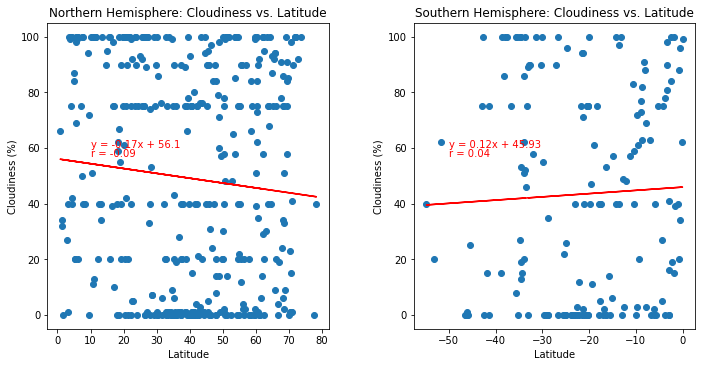

In [55]:
# Cloudiness plots
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#Northern
ax1.scatter(n_hemisphere['Latitude'], n_hemisphere['Cloudiness'])
ax1.set_title('Northern Hemisphere: Cloudiness vs. Latitude')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_hemisphere['Latitude'], n_hemisphere['Cloudiness'])
regress_values = n_hemisphere['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
ax1.plot(n_hemisphere['Latitude'],regress_values, "r-")
ax1.annotate(line_eq,(10,60),fontsize=10,color="red")
ax1.annotate(f"r = {round(rvalue, 2)}", (10,57), fontsize=10,color='red')

# Southern
ax2.scatter(s_hemisphere['Latitude'], s_hemisphere['Cloudiness'])
ax2.set_title('Southern Hemisphere: Cloudiness vs. Latitude')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_hemisphere['Latitude'], s_hemisphere['Cloudiness'])
regress_values = s_hemisphere['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
ax2.plot(s_hemisphere['Latitude'],regress_values, "r-")
ax2.annotate(line_eq,(-50,60),fontsize=10,color="red")
ax2.annotate(f"r = {round(rvalue, 2)}", (-50,57), fontsize=10,color='red')

fig.subplots_adjust(left=0.08, right=0.98, bottom=.05, top=0.9, hspace=0.2, wspace=0.3)
plt.show()

# Cloudiness Analysis

In [ ]:
# 1) Plots for northern and southern hemispheres indicate a weak, oppostite relationship to each other
#    with the northern hemisphere showing a negative relationship with latitude and cloudiness, and sourthern having a positive
#    relationship with latitude and cloudiness. However, both show a trend of decreasing temperature as you move further from
#    the equator (indicated by 0 on the x-axis)

# 2) There is a weak correlation between latitude and cloudiness in both the northern and southern hemispheres,
#    with a -.06 and a .11 correlation (r-value) in the Northern and Sourthern hemisphere respectively. For the purposes
#    of this analysis r-values >.5 indicate a strong correlation.

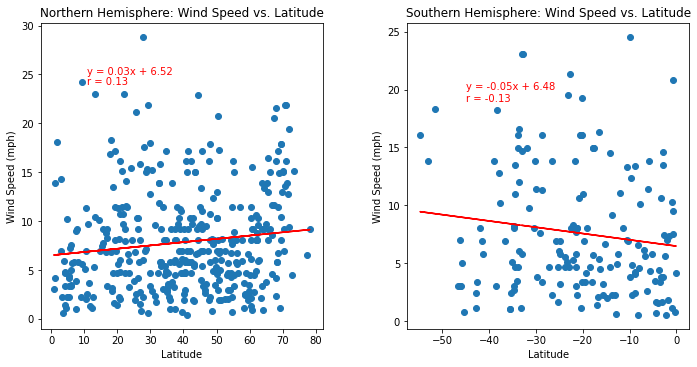

In [56]:
# Wind Speed plots
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
                        
#Northern
ax1.scatter(n_hemisphere['Latitude'], n_hemisphere['Wind Speed'])
ax1.set_title('Northern Hemisphere: Wind Speed vs. Latitude')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_hemisphere['Latitude'], n_hemisphere['Wind Speed'])
regress_values = n_hemisphere['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
ax1.plot(n_hemisphere['Latitude'],regress_values, "r-")
ax1.annotate(line_eq,(11,25),fontsize=10,color="red")
ax1.annotate(f"r = {round(rvalue, 2)}", (11,24), fontsize=10,color='red')

#Southern
ax2.scatter(s_hemisphere['Latitude'], s_hemisphere['Wind Speed'])
ax2.set_title('Southern Hemisphere: Wind Speed vs. Latitude')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_hemisphere['Latitude'], s_hemisphere['Wind Speed'])
regress_values = s_hemisphere['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
ax2.plot(s_hemisphere['Latitude'],regress_values, "r-")
ax2.annotate(line_eq,(-45,20),fontsize=10,color="red")
ax2.annotate(f"r = {round(rvalue, 2)}", (-45,19), fontsize=10,color='red')
                        
fig.subplots_adjust(left=0.08, right=0.98, bottom=.05, top=0.9, hspace=0.2, wspace=0.3)
plt.show()

# Wind Speed Analysis

In [ ]:
# 1) Similar to the other correlations showing the relationship between latitude and weather patterns, 
#    wind speed for the northern and southern hemispheres appear to have opposite relationships. However
#    the relationships show that as you get further away from the equator (0 on each plot) wind speeds tend to increase

# 2) There is a weak correlation between latitude and cloudiness in both the northern and southern hemispheres,
#    with a .11 and a .12 correlation (r-value) in the Northern and Sourthern hemisphere respectively. For the purposes
#    of this analysis r-values >.5 indicate a strong correlation.